In [11]:
import commands
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
files = commands.getoutput("find /Volumes/HD-PLFU3/AnalysisResult/ -maxdepth 3 -type f -name shift_phase.npy").split('\n')
for f in files : print f
print len(files)

/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0008/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0014/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0015/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0017/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0034/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0035/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0036/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20140911-2/C001H001S0038/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20160907-3/C001H001S0006/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20160907-3/C001H001S0011/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20160907-3/C001H001S0017/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20160907-3/C001H001S0022/shift_phase.npy
/Volumes/HD-PLFU3/AnalysisResult//20161019-1/C001H001S0018/shift_phase.npy
/Volumes/HD-PLFU3/Analysi

In [5]:
def phase_add(a, b):
    a_ = np.cos(a) + np.sin(a)*1j
    b_ = np.cos(b) + np.sin(b)*1j
    return np.angle(a_*b_)

def phase_statics(X):
    a = 0
    for x in X: a += ( np.cos(x) + np.sin(x)*1j)
    a /= len(X)
    return np.angle(a), 1-np.abs(a)

print phase_add(np.pi/4, -np.pi/2)/np.pi
X = np.arange(-np.pi, np.pi, 0.01*np.pi)
mean, var = phase_statics(X)
print mean, var

-0.25
-0.0215697043185 1.0


In [6]:
list_data = [ np.load(f) for f in files]
list_phase = []
for d in list_data : list_phase.extend(list(d))
list_phase = np.array(list_phase)
print list_phase.shape

(2120,)


[ 2.27261714  2.54550033  2.07590368 ...,  1.54890451  1.96134066
  2.64478515]
(2120,)
mean 2.50245428816
var 0.33566031098


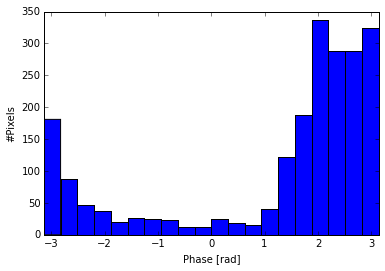

In [14]:
print list_phase
print list_phase.shape

mean, var = phase_statics(list_phase)
print "mean", mean
print "var", var

hist_phase, _, _ = plt.hist(list_phase, np.arange(-np.pi, np.pi+0.05*np.pi, 0.1*np.pi))
plt.xlim(-np.pi, np.pi)
plt.xlabel("Phase [rad]")
plt.ylabel("#Pixels")
plt.savefig("/Users/tomii/tmp/AnalysisResult/phase_shift_total.png")
plt.show()

[ 181.   88.   47.   37.   20.   27.   24.   23.   12.   12.   24.   19.
   15.   41.  122.  188.  337.  289.  289.  325.]


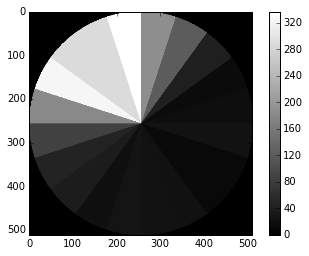

In [16]:
def getAngleDensityMap(hist_phase, size = 512):
    img = np.zeros([size, size])
    center = [size / 2, size/2]
    print hist_phase
    for i in range(size): # y 
        for j in range(size): # x
            pos = ( j - center[1] ) + 1j*( i - center[0] )
            if np.abs(pos) < size / 2:
                img[i,j] = hist_phase[int( - ( np.angle( pos ) + np.pi ) / (0.1*np.pi) )]
    return img

img = getAngleDensityMap(hist_phase)

plt.imshow(img, cmap='gray')
plt.colorbar()
plt.show()

(45,)


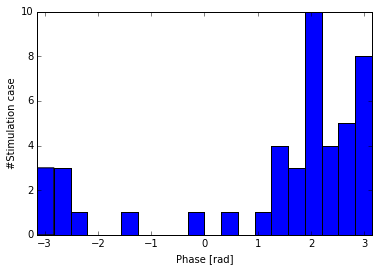

In [61]:
means = np.array([phase_statics(d)[0] for d in list_data])
print means.shape
plt.hist(means, np.arange(-np.pi, np.pi+0.05*np.pi, np.pi*0.1))
plt.xlim(-np.pi, np.pi)
plt.xlabel("Phase [rad]")
plt.ylabel("#Stimulation case")
plt.savefig("/Users/tomii/tmp/AnalysisResult/phase_shift_means.png")